# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')
df = websites.copy()

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Completed Caracterization

def data_caracterization():
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    return df.head(5)

In [4]:
data_caracterization()

Caracterization:

Number of Rows: 1781

Number of Columns: 21

Columns Names/Variables/Features: ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             9

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
def data_explore(df): # sum & returns duplicates, NaN & two empty spaces
    duplicate_rows = df.duplicated().sum()
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows.")
    return exploration

In [6]:
data_explore(df)

There are 0 duplicate rows.


,NaN,EmptySpaces
URL,0,0
URL_LENGTH,0,0
NUMBER_SPECIAL_CHARACTERS,0,0
CHARSET,7,0
SERVER,176,0
CONTENT_LENGTH,812,0
WHOIS_COUNTRY,306,0
WHOIS_STATEPRO,362,0
WHOIS_REGDATE,127,0
WHOIS_UPDATED_DATE,139,0


In [7]:
#Formatting to lower.case columns

df.columns = df.columns.str.lower() 

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

The columns listed appear to be features of websites. Here's a brief description of each:

    URL: The Uniform Resource Locator, the address of the website.
    URL_LENGTH: The length of the URL.
    NUMBER_SPECIAL_CHARACTERS: Number of special characters in the URL.
    CHARSET: Character encoding (e.g., UTF-8, ISO-8859-1).
    SERVER: Web server software (e.g., Apache, nginx).
    CONTENT_LENGTH: Length of the content returned by the server.
    WHOIS_COUNTRY: Country of the domain registration.
    WHOIS_STATEPRO: State or province of the domain registration.
    WHOIS_REGDATE: Registration date of the domain.
    WHOIS_UPDATED_DATE: Last updated date of the domain registration record.
    TCP_CONVERSATION_EXCHANGE: Number of TCP connections made.
    DIST_REMOTE_TCP_PORT: Number of TCP ports different from the one used for communication.
    REMOTE_IPS: Number of IPs connected to the honeypot.
    APP_BYTES: Number of bytes transferred.
    SOURCE_APP_PACKETS: Number of packets sent from the source to the destination.
    REMOTE_APP_PACKETS: Number of packets sent from the destination to the source.
    SOURCE_APP_BYTES: Number of bytes sent from the source to the destination.
    REMOTE_APP_BYTES: Number of bytes sent from the destination to the source.
    APP_PACKETS: Number of packets sent in total.
    DNS_QUERY_TIMES: Number of DNS queries performed.
    Type: The type of website (e.g., malicious or benign).
    
These features likely come from a dataset used for website classification or analysis, with the 'Type' column indicating a target variable or label.

In [8]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0,0.0,0


In [9]:
#Correlation with target:
numeric_df.corrwith(numeric_df["type"]).sort_values(ascending=False)


type                         1.000000
number_special_characters    0.280897
url_length                   0.162104
dns_query_times              0.068753
remote_app_bytes            -0.011004
app_bytes                   -0.011262
remote_app_packets          -0.032897
source_app_packets          -0.034414
app_packets                 -0.034414
tcp_conversation_exchange   -0.040202
source_app_bytes            -0.043852
remote_ips                  -0.078783
dist_remote_tcp_port        -0.082925
content_length              -0.090852
dtype: float64

In [10]:
num_corr = round(numeric_df.corr(),2)
num_corr

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url_length,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.03,-0.01,-0.03,-0.04,-0.07,0.16
number_special_characters,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.04,-0.03,-0.01,-0.02,-0.04,-0.05,0.28
content_length,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.07,0.09,0.10,0.05,0.07,-0.05,-0.09
tcp_conversation_exchange,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.99,0.87,0.46,1.00,0.35,-0.04
dist_remote_tcp_port,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.59,0.31,0.78,0.56,0.26,-0.08
remote_ips,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.30,0.17,0.03,0.36,0.55,-0.08
app_bytes,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.45,0.47,0.07,1.00,0.45,0.01,-0.01
source_app_packets,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.99,0.86,0.45,1.00,0.41,-0.03
remote_app_packets,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,0.99,1.00,0.88,0.47,0.99,0.36,-0.03
source_app_bytes,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,0.88,1.00,0.08,0.86,0.22,-0.04


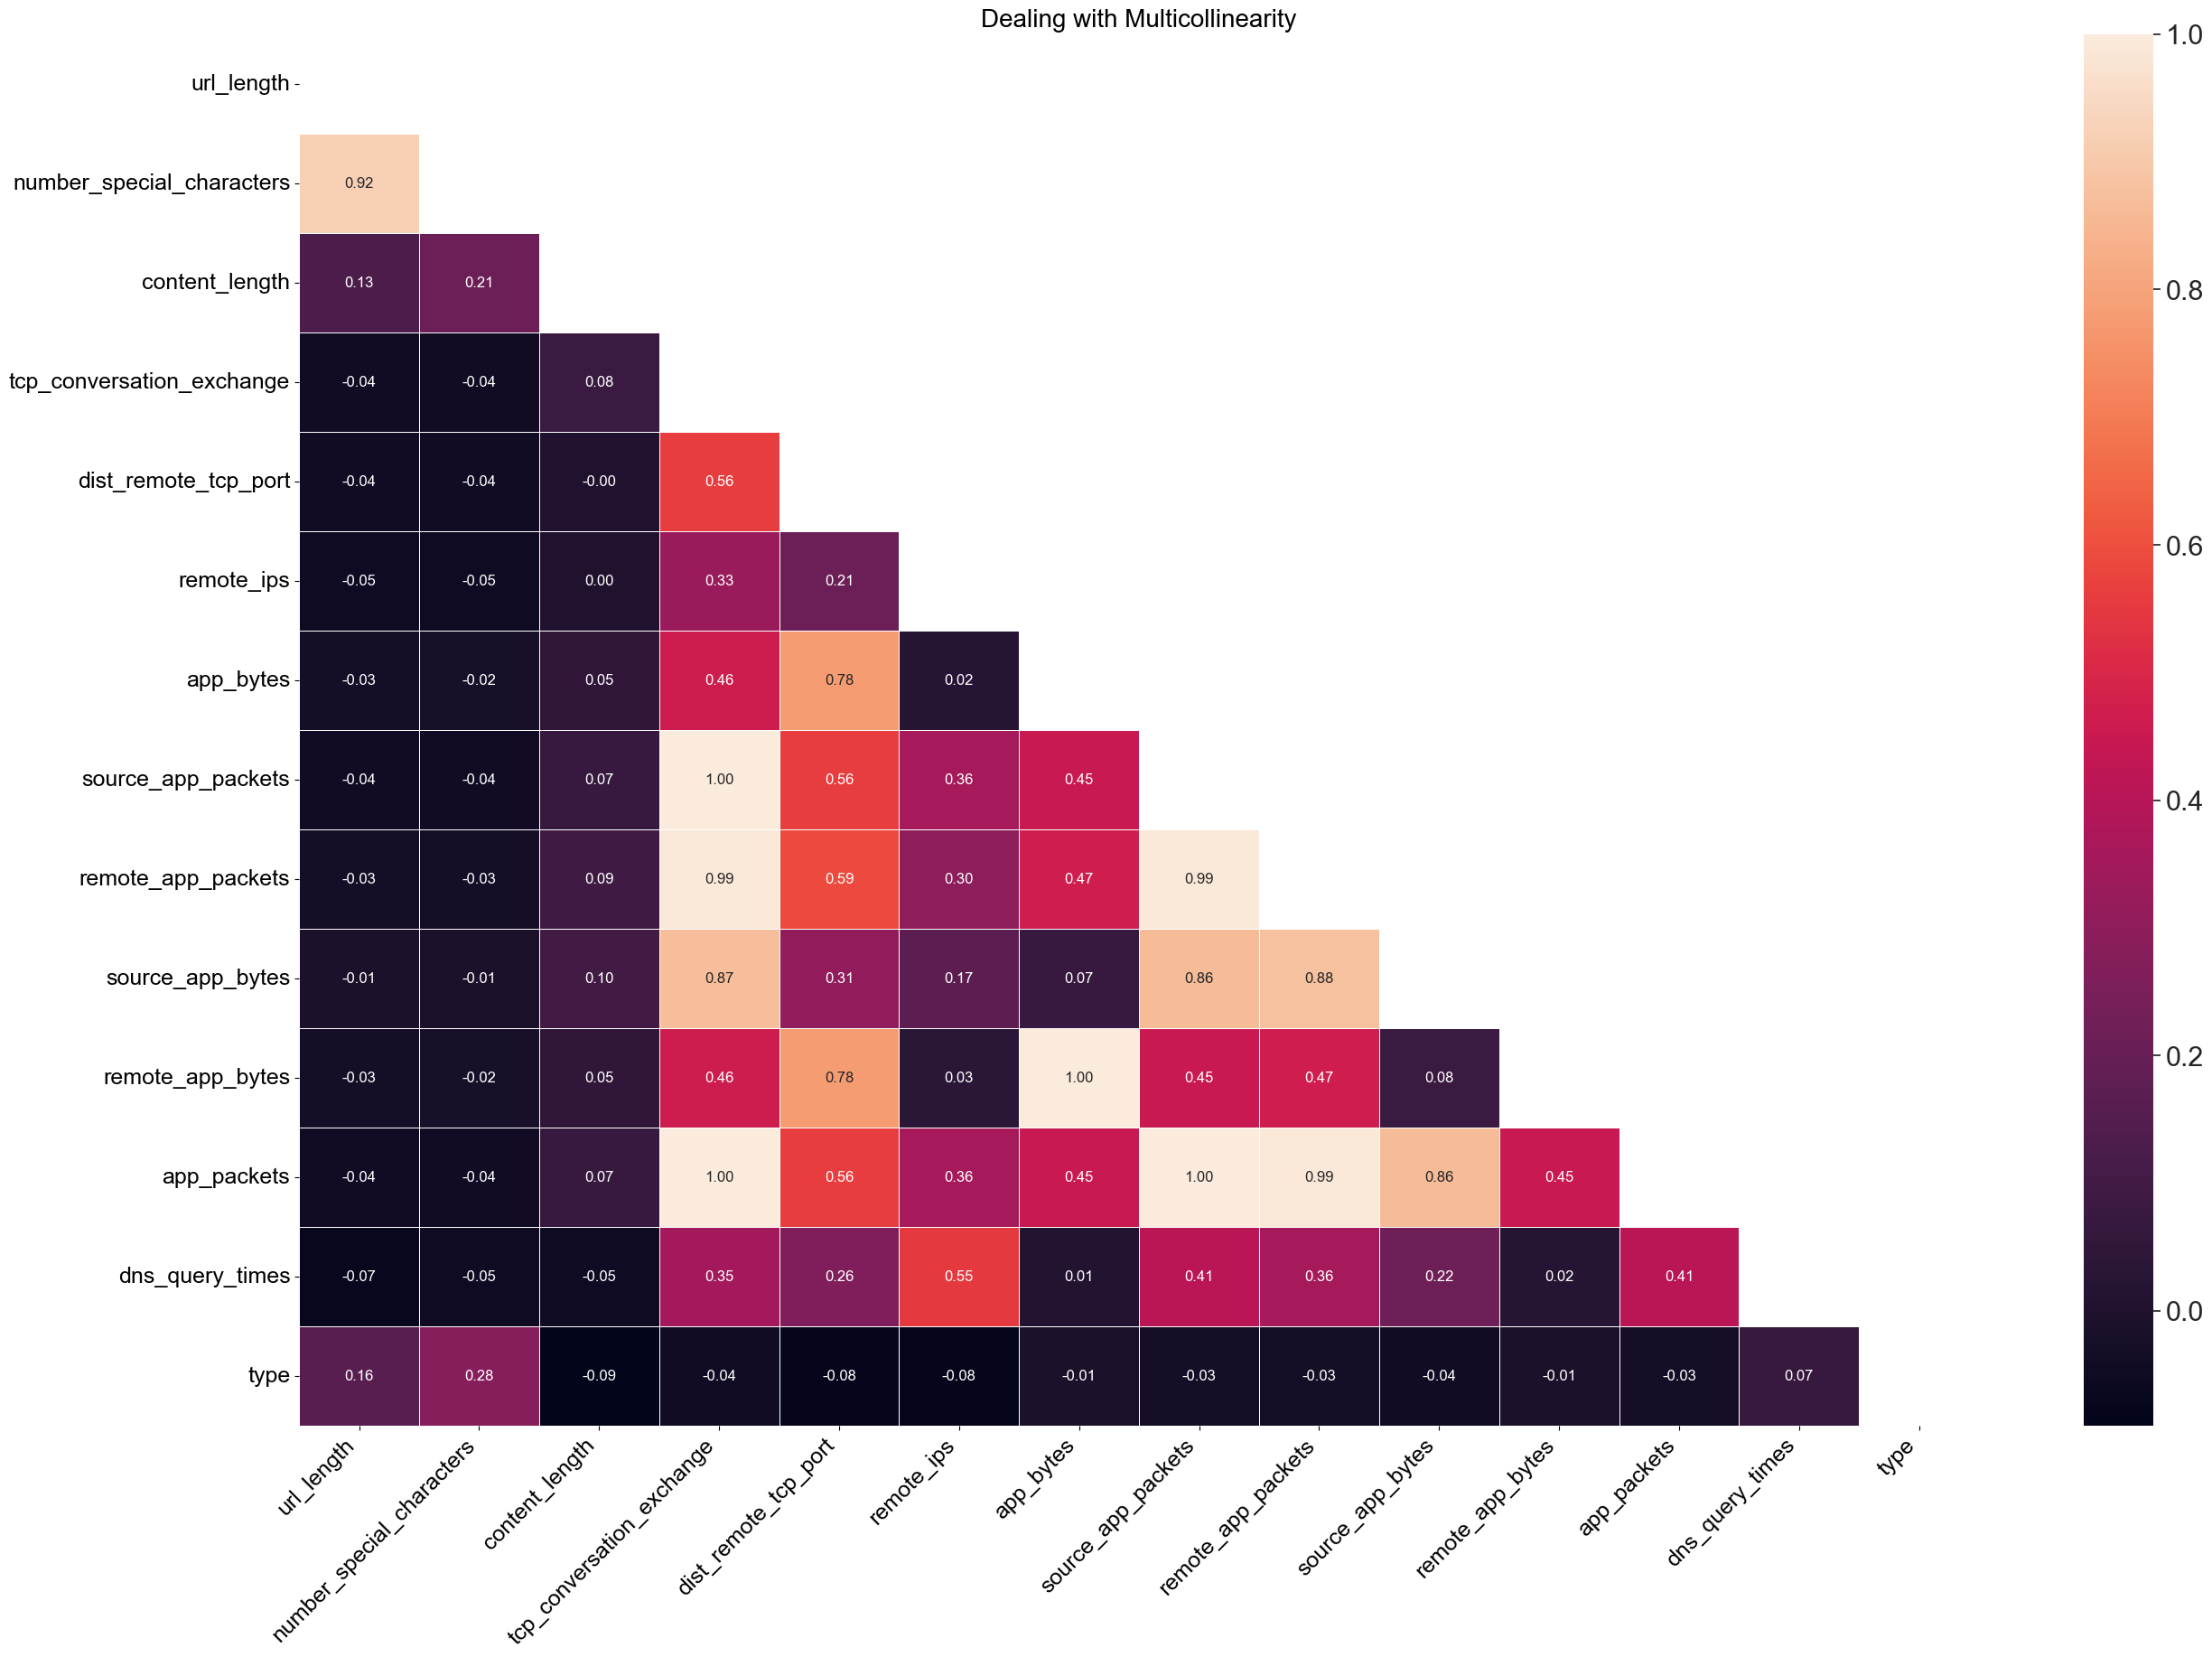

In [11]:
# Heatmap
num_corr_array = num_corr.values

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2) # increase font size

ax = sns.heatmap(num_corr, mask = mask, annot=True, annot_kws={"size": 12}, linewidths=.5, fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18) 
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [12]:
numeric_df.columns

Index(['url_length', 'number_special_characters', 'content_length',
       'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips',
       'app_bytes', 'source_app_packets', 'remote_app_packets',
       'source_app_bytes', 'remote_app_bytes', 'app_packets',
       'dns_query_times', 'type'],
      dtype='object')

In [13]:
trash = ['number_special_characters','tcp_conversation_exchange', 'dist_remote_tcp_port','app_bytes', 'source_app_packets',
       'source_app_bytes', 'remote_app_bytes', 'app_packets']

numeric_df2= numeric_df.drop(trash, axis=1)


Groups deleted:

    1. First two columns: 'tcp_conversation_exchange', 'dist_remote_tcp_port'
    2. Columns  with "app" still with high multicolinarity:   'app_bytes', 'source_app_packets', 'remote_app_packets',
    'source_app_bytes', 'remote_app_bytes', 'app_packets'
    3. 'number_special_characters'

In [14]:
#Correlation with target:

numeric_df2.corrwith(numeric_df2["type"]).sort_values(ascending=False)
num_corr2 = round(numeric_df2.corr(),2)
num_corr2

,url_length,content_length,remote_ips,remote_app_packets,dns_query_times,type
url_length,1.00,0.13,-0.05,-0.03,-0.07,0.16
content_length,0.13,1.00,0.00,0.09,-0.05,-0.09
remote_ips,-0.05,0.00,1.00,0.30,0.55,-0.08
remote_app_packets,-0.03,0.09,0.30,1.00,0.36,-0.03
dns_query_times,-0.07,-0.05,0.55,0.36,1.00,0.07
type,0.16,-0.09,-0.08,-0.03,0.07,1.00


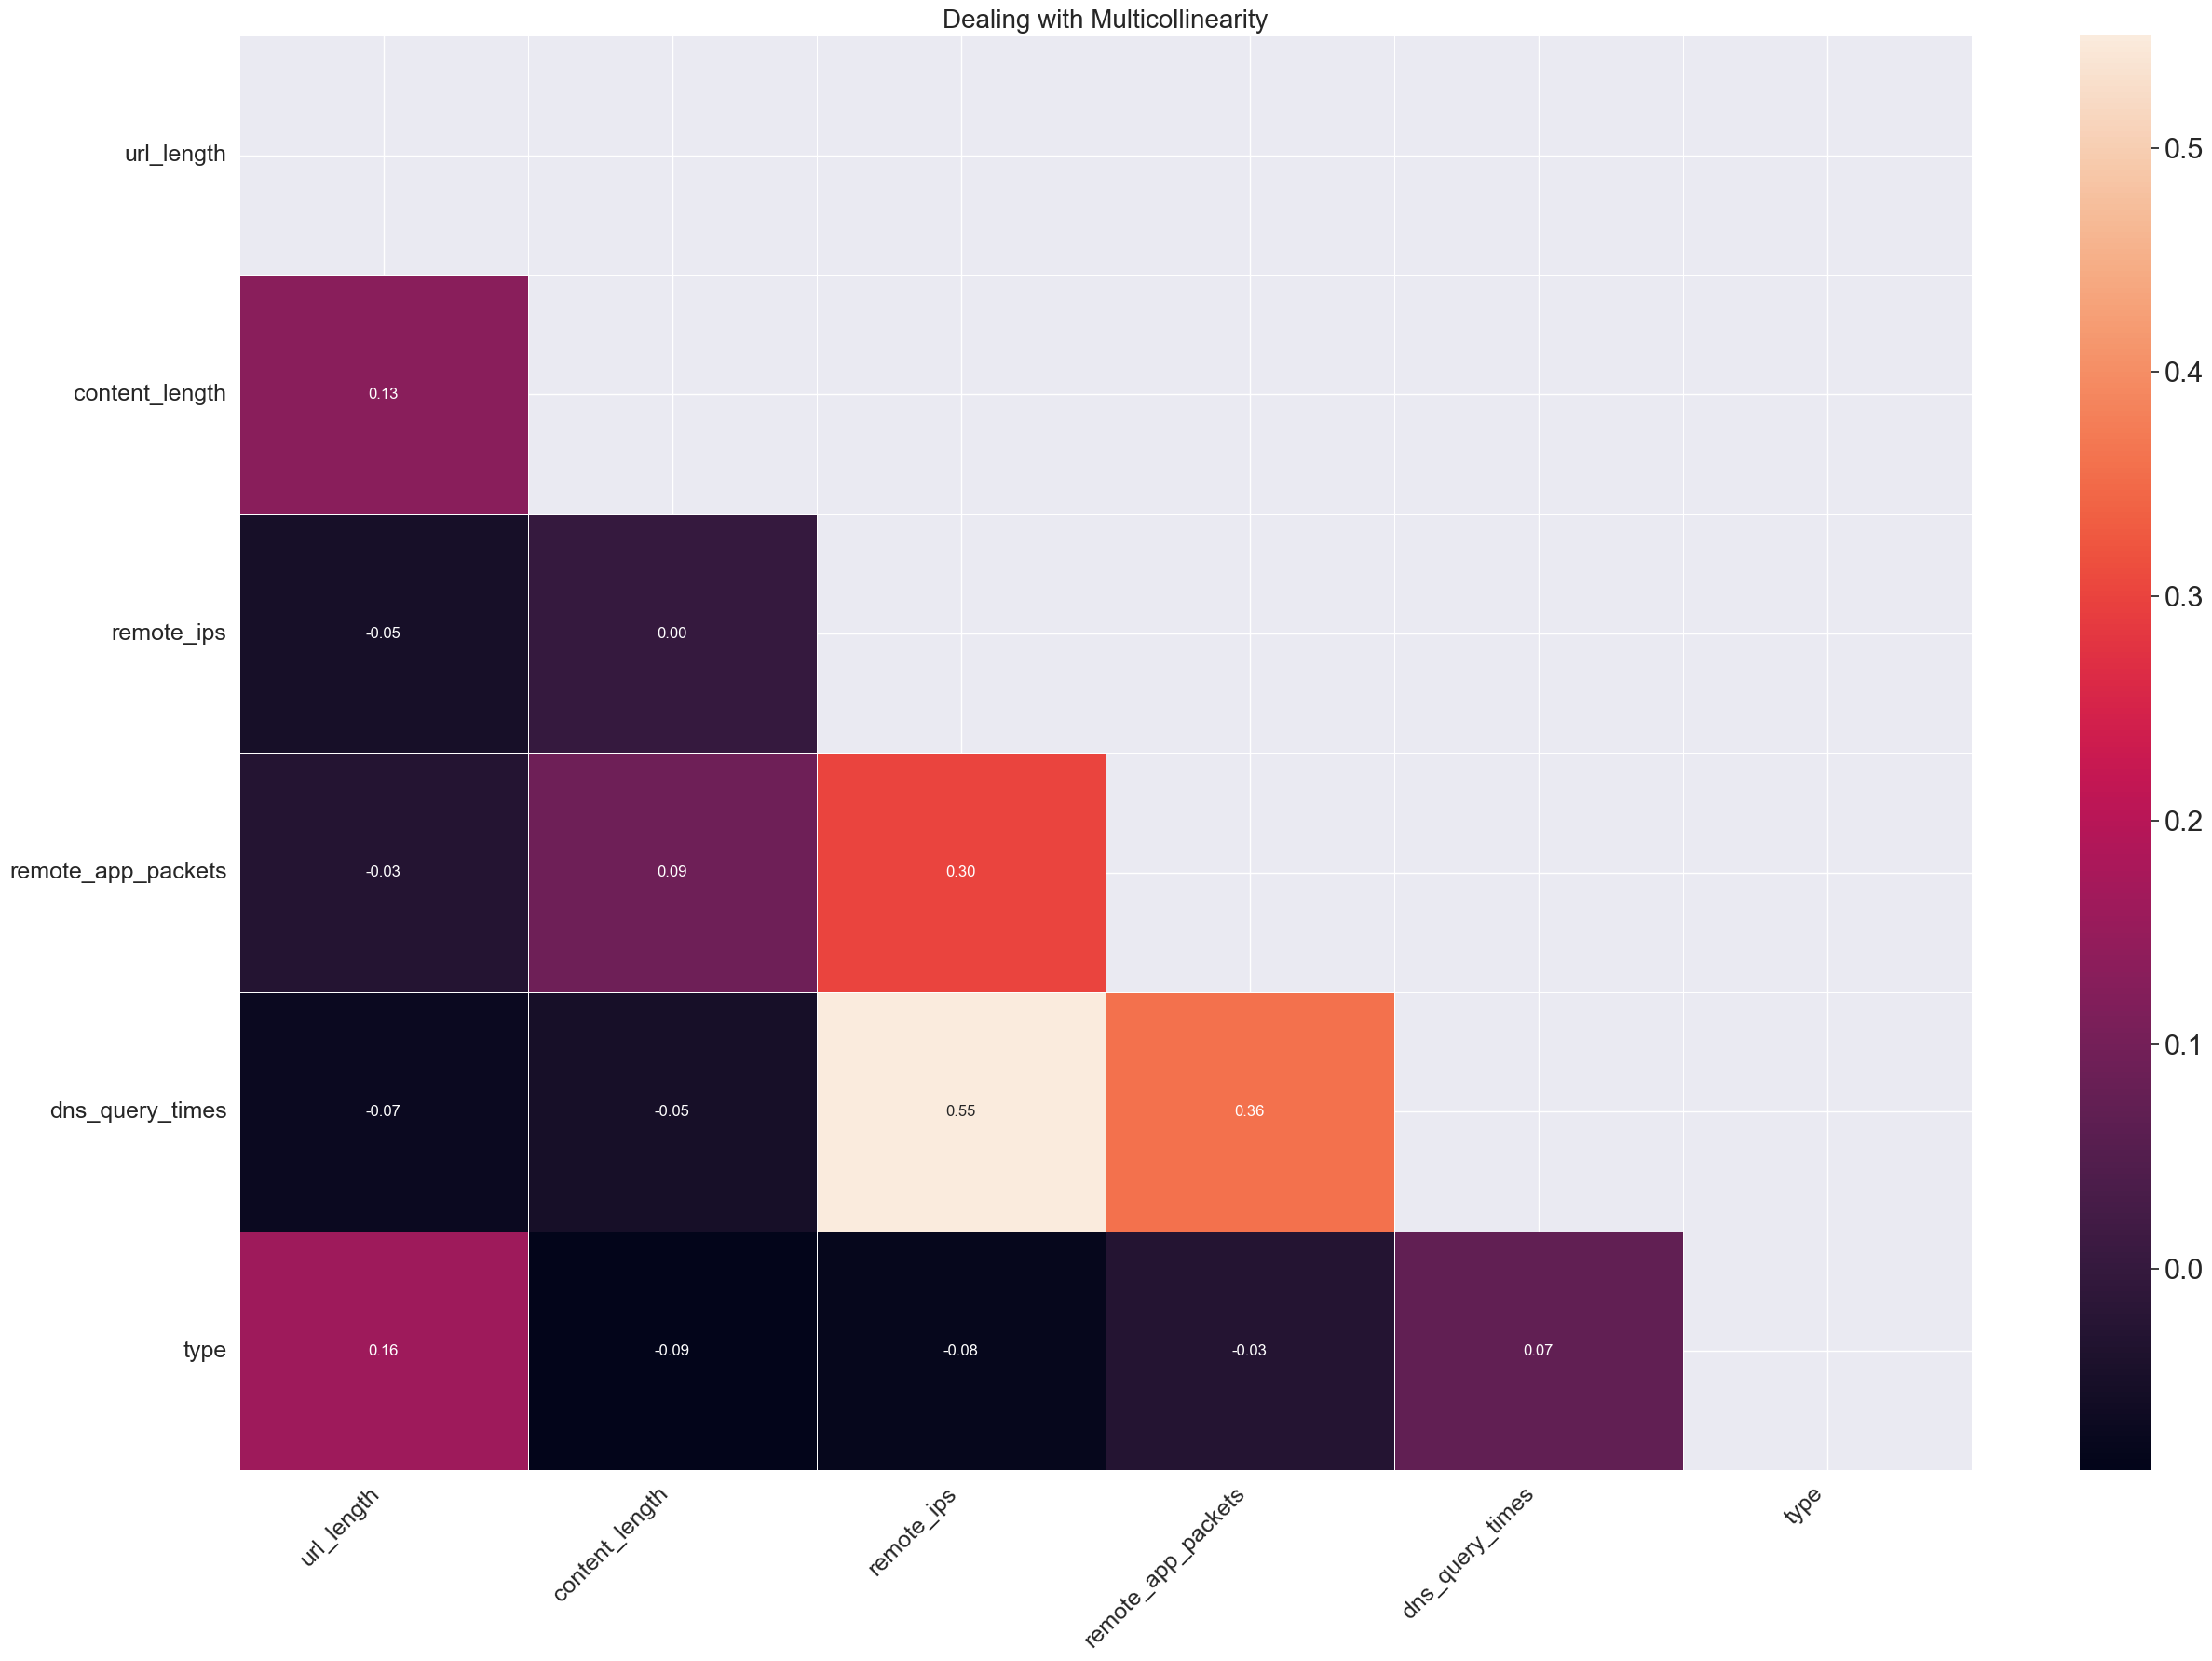

In [15]:
# Heatmap
num_corr_array = num_corr.values

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr2)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2) # increase font size

ax = sns.heatmap(num_corr2, mask = mask, annot=True, annot_kws={"size": 12}, linewidths=.5, fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18) 
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [16]:
def data_explore(df): 
    duplicate_rows = df.duplicated().sum()
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [17]:
data_explore(numeric_df2)

There are 249 duplicate rows. Also;


,NaN,EmptySpaces
url_length,0,0
content_length,812,0
remote_ips,0,0
remote_app_packets,0,0
dns_query_times,1,0
type,0,0


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [18]:
# 'content_length' has almost 100% of NaN We delete in df, and create a new one

df2 = df.drop('content_length', axis = 1, inplace = True)
df2 = df.drop_duplicates()

In [19]:
df2 = df2.dropna(subset = "dns_query_times")

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [20]:
# We applied the numeric transformation to this df2

In [21]:
trash = ['number_special_characters','tcp_conversation_exchange', 'dist_remote_tcp_port','app_bytes', 'source_app_packets',
       'source_app_bytes', 'remote_app_bytes', 'app_packets']
df2= df2.drop(trash, axis=1)


In [22]:
data_explore(df2) #No duplicates and Nulls 

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
url,0,0
url_length,0,0
charset,7,0
server,176,0
whois_country,306,0
whois_statepro,362,0
whois_regdate,127,0
whois_updated_date,139,0
remote_ips,0,0
remote_app_packets,0,0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [23]:
df2["whois_country"].unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [24]:
df2["whois_country"] = df2["whois_country"].replace("Cyprus","CY")
df2["whois_country"] = df2["whois_country"].replace("us", "US")
df2["whois_country"] = df2["whois_country"].replace("se","SE")
df2["whois_country"] = df2["whois_country"].replace(["United Kingdom","[u'GB'; u'UK']","GB"], "UK")

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [25]:
country_counts = df2["whois_country"].value_counts()
country_counts

whois_country
US    1106
CA      83
ES      63
UK      35
AU      35
PA      21
JP      11
CN      10
IN      10
FR       9
CZ       9
CH       6
NL       6
KR       5
PH       4
ru       4
AT       4
BS       4
SE       4
KY       3
SC       3
BE       3
TR       3
HK       3
DE       3
BR       2
CY       2
UA       2
UY       2
KG       2
RU       2
NO       2
IL       2
SI       2
LV       1
PK       1
IT       1
LU       1
BY       1
AE       1
IE       1
UG       1
TH       1
Name: count, dtype: int64

In [26]:
# US count mayority of the entries, so we filter to see the other groups
country_counts_nous = df2[df2["whois_country"] != "US"]["whois_country"].value_counts()



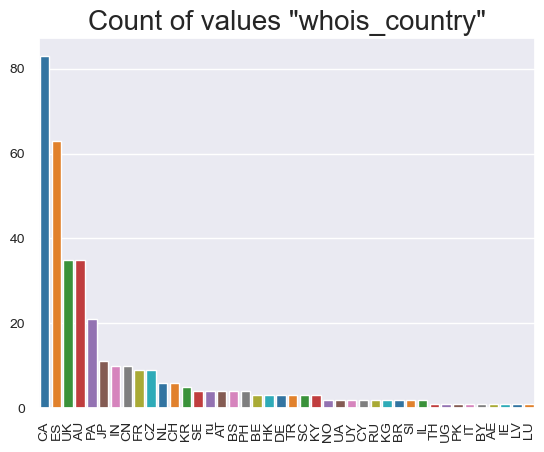

In [27]:
sns.barplot(x=country_counts_nous.index, y=country_counts_nous.values, palette="tab10")

plt.xticks(rotation=90, fontsize=10)
plt.xlabel(None)
plt.yticks(fontsize=10)
plt.title('Count of values "whois_country"', fontsize=20)
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [28]:
top_10_values = country_counts.head(10).index
df2.loc[~df2["whois_country"].isin(top_10_values), "whois_country"] = "Other"
df2["whois_country"]

0       Other
1       Other
2       Other
3          US
4          US
        ...  
1776       ES
1777       ES
1778       US
1779       US
1780       US
Name: whois_country, Length: 1780, dtype: object

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [29]:
trash2 = ['whois_statepro', 'whois_regdate', 'whois_updated_date']
df2= df2.drop(trash2, axis=1)


In [30]:
data_explore(df2)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
url,0,0
url_length,0,0
charset,7,0
server,176,0
whois_country,0,0
remote_ips,0,0
remote_app_packets,0,0
dns_query_times,0,0
type,0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [31]:
df2.dtypes


url                    object
url_length              int64
charset                object
server                 object
whois_country          object
remote_ips              int64
remote_app_packets      int64
dns_query_times       float64
type                    int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [32]:
df2= df2.drop("url", axis=1)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [33]:
df2["charset"].unique()


array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [34]:
df2 = df2.dropna(subset = "charset")

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [35]:
df2["server"].unique()


array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Ap

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [36]:
df2["server"] = np.where(df2["server"].str.contains("Microsoft"), "Microsoft", df2["server"])
df2["server"] = np.where(df2["server"].str.contains("Apache"), "Apache", df2["server"])
df2["server"] = np.where(df2["server"].str.contains("nginx"), "nginx", df2["server"])


In [37]:
df2["server"] = np.where(~df2["server"].isin(["Microsoft","Apache","nginx"]), "Other", df2["server"])

In [38]:
df2['server'].value_counts()

server
Apache       640
nginx        435
Microsoft    371
Other        327
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [39]:
website_dummy = pd.get_dummies(df2.select_dtypes(include=['object']))



Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [40]:
website_dummy

,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft,...,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_IN,whois_country_JP,whois_country_Other,whois_country_PA,whois_country_UK,whois_country_US
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1777,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1778,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1779,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Your code here:


In [42]:
dfconcat = df2.drop(["charset","server","whois_country"], axis=1)


In [43]:
websitepd = pd.concat([website_dummy, dfconcat],axis=1)
websitepd

,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft,...,whois_country_JP,whois_country_Other,whois_country_PA,whois_country_UK,whois_country_US,url_length,remote_ips,remote_app_packets,dns_query_times,type
0,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,16,2,10,2.0,1
1,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,16,4,19,0.0,0
2,False,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,16,0,0,0.0,0
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,17,3,37,8.0,0
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,17,5,62,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,194,0,3,0.0,1
1777,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,198,0,2,0.0,1
1778,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,201,6,89,4.0,0
1779,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,234,0,0,0.0,0


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [44]:
X = websitepd.drop("type", axis=1)
y = websitepd["type"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'100% of our data: {len(websitepd)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1773.
70% for training data: 1241.
30% for test data: 532.


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
predictions = model.predict(X_test)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       459
           1       0.91      0.42      0.58        73

    accuracy                           0.92       532
   macro avg       0.91      0.71      0.77       532
weighted avg       0.92      0.92      0.90       532



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [49]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9154135338345865
Train data accuracy:  0.9266720386784851


In [56]:
y_pred = predictions

In [57]:
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

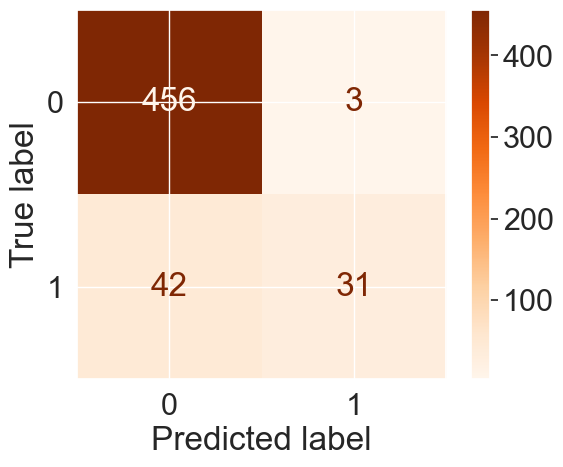

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

In [52]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)

In [61]:
print(f'100% of our data: {len(websitepd)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1773.
70% for training data: 1241.
30% for test data: 532.


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here